In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


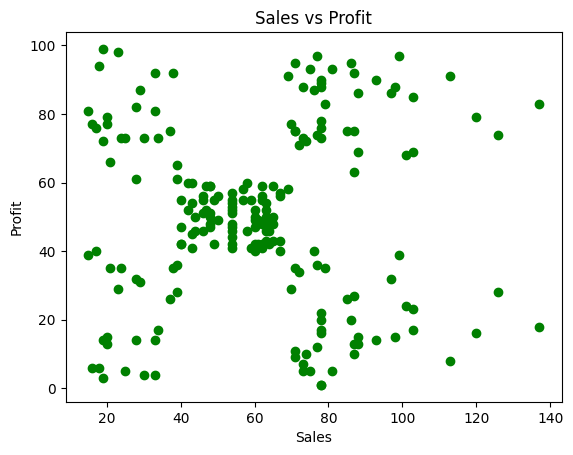

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='green')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show() 

In [5]:
X = df.iloc[:,[3,4]]

In [6]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


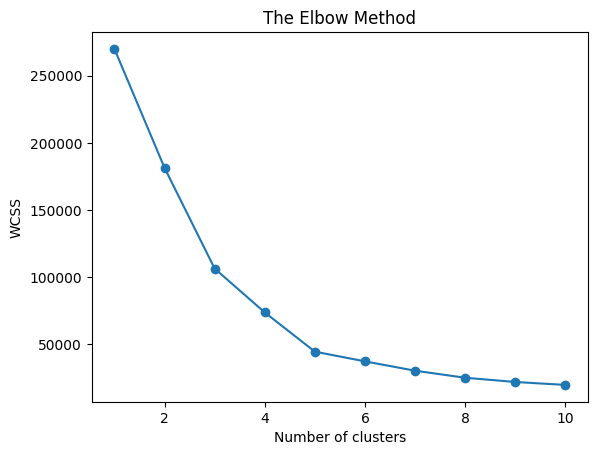

In [7]:
#please ignore the KMean memory leak warning it was nothing to do with the Model
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [8]:

#please ignore the KMean memory leak warning it was nothing to do with the Modelkmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
print(y_kmeans)

[8 7 3 7 8 7 3 7 3 7 3 7 3 7 3 7 8 7 8 7 8 7 3 7 3 7 8 0 8 7 3 7 3 7 3 7 3
 7 8 7 8 7 8 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 4 1 4 1 4 9 4 9 4 1 4 9 4 9 4 9 4 9 4 1 4 9 4 1 4
 1 4 9 4 9 4 9 4 9 4 9 4 1 4 9 4 1 4 9 4 1 4 9 4 9 4 9 4 9 4 9 4 1 2 6 2 1
 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2]


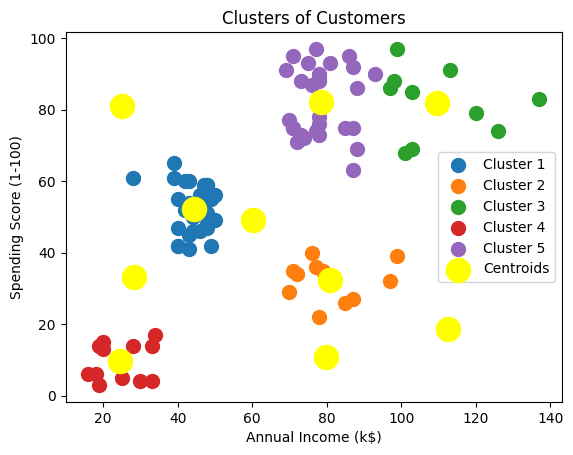

In [10]:
for cluster in range(5):  
    plt.scatter(
        X.iloc[y_kmeans == cluster, 0], 
        X.iloc[y_kmeans == cluster, 1], 
        s=100, 
        label=f'Cluster {cluster + 1}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=300, 
    c='yellow', 
    label='Centroids'
)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.45925273534781125
